In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
grouped_merged_data = merged_data.groupby(['Drug Regimen'])

mean_volume = pd.DataFrame(grouped_merged_data.mean()['Tumor Volume (mm3)'])
mean_volume = mean_volume.rename(columns={'Tumor Volume (mm3)': 'Mean'})

median_volume = pd.DataFrame(grouped_merged_data.median()['Tumor Volume (mm3)'])
median_volume = median_volume.rename(columns={'Tumor Volume (mm3)': 'Median'})

variance = pd.DataFrame(grouped_merged_data.var()['Tumor Volume (mm3)'])
variance = variance.rename(columns={'Tumor Volume (mm3)': 'Variance'})

standard_dev = pd.DataFrame(grouped_merged_data.std()['Tumor Volume (mm3)'])
standard_dev = standard_dev.rename(columns={'Tumor Volume (mm3)': 'Standard Deviation'})

sem = pd.DataFrame(grouped_merged_data.sem()['Tumor Volume (mm3)'])
sem = sem.rename(columns={'Tumor Volume (mm3)': 'SEM'})


summary = [mean_volume, median_volume, variance, standard_dev, sem]
summary_df = pd.concat(summary,axis=1,join='inner')
summary_df = summary_df.round(2)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


Text(0, 0.5, 'Tumor Volume (mm3)')

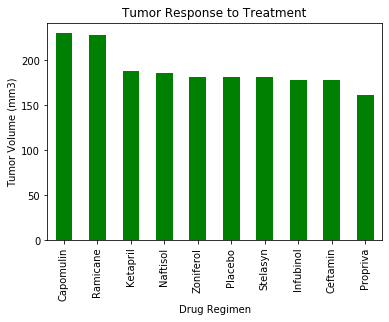

In [130]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimens = merged_data["Drug Regimen"].value_counts()
bar_plot = regimens.plot(kind="bar", color='g')

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

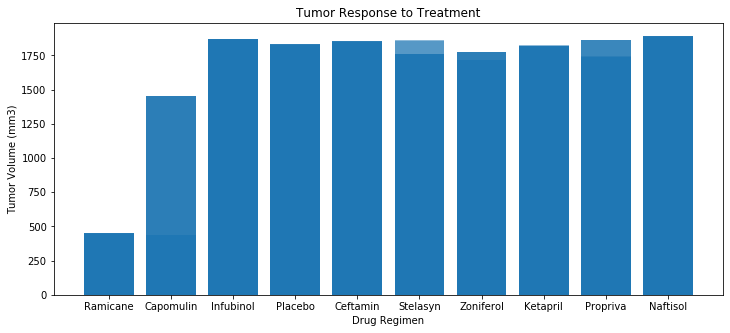

In [131]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(merged_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.bar(merged_data["Drug Regimen"], x_axis, alpha=0.5, align="center")
plt.show()


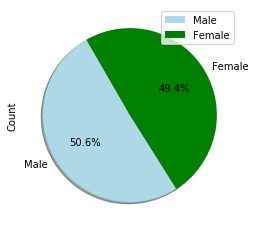

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_count_df = pd.DataFrame(merged_data['Sex'].value_counts())
mice_gender_count_df

gender_info = pd.DataFrame({'Count':[958, 935]},
                   index = ['Male', 'Female'])
colors = ['lightblue','green']
gender_pie = gender_df.plot.pie(y='Count', colors=colors, autopct="%1.1f%%", shadow=True, startangle=120, 
                                legend='best')

/Users/jasmineorr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x1a1d08e550>,
 [Text(-0.9419582018196061, -0.5680798764476473, 'Male'),
  Text(0.941958201819606, 0.5680798764476477, 'Female')],
 [Text(-0.5137953828106941, -0.3098617507896258, '50.6%'),
  Text(0.5137953828106941, 0.30986175078962597, '49.4%')])

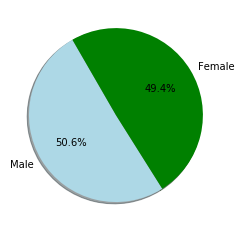

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_count_df = pd.DataFrame(merged_data['Sex'].value_counts())
labels = ["Male", "Female"]
colors = ['lightblue','green']
plt.pie(mice_gender_count_df, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, 
        startangle=120)

In [165]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
Capomulin_regimen = merged_data[merged_data["Drug Regimen"].isin(["Capomulin"])]
Capomulin_data = Capomulin_regimen.sort_values(by='Timepoint', ascending=False)
grouped_Capomulin = Capomulin_data.groupby(['Mouse ID'])
largest_Cap_timepoint = grouped_Capomulin.first()
sorted_Cap_tumor_vol = largest_Cap_timepoint.sort_values(by='Tumor Volume (mm3)', ascending=False)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = round(sorted_Cap_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75]), 2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of tumor volume for Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume for Capomulin is: {upperq}")
print(f"The interquartile range of tumor volume for Capomulin is: {iqr}")
print(f"The the median of tumor volume for Capomulin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

sorted_Cap_tumor_vol

The lower quartile of tumor volume for Capomulin is: 32.38
The upper quartile of tumor volume for Capomulin is: 40.16
The interquartile range of tumor volume for Capomulin is: 7.78
The the median of tumor volume for Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,15,46.539206,0
r944,Capomulin,Male,12,25,45,41.581521,2
l509,Capomulin,Male,17,21,45,41.483008,3
s710,Capomulin,Female,1,23,45,40.728578,1
v923,Capomulin,Female,19,21,45,40.658124,2
g316,Capomulin,Female,22,22,45,40.159220,2
w150,Capomulin,Male,23,23,10,39.952347,0
b128,Capomulin,Female,9,22,45,38.982878,2


In [166]:
Ramicane_regimen = merged_data[merged_data["Drug Regimen"].isin(["Ramicane"])]
Ramicane_data = Ramicane_regimen.sort_values(by='Timepoint', ascending=False)
grouped_Ramicane = Ramicane_data.groupby(['Mouse ID'])
largest_Ram_timepoint = grouped_Ramicane.first()
sorted_Ram_tumor_vol = largest_Ram_timepoint.sort_values(by='Tumor Volume (mm3)', ascending=False)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = round(sorted_Ram_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75]), 2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of tumor volume for Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume for Ramicane is: {upperq}")
print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")
print(f"The the median of tumor volume for Ramicane is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

sorted_Ram_tumor_vol

The lower quartile of tumor volume for Ramicane is: 31.56
The upper quartile of tumor volume for Ramicane is: 40.66
The interquartile range of tumor volume for Ramicane is: 9.1
The the median of tumor volume for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
q597,Ramicane,Male,20,25,45,45.220869,2
y449,Ramicane,Male,19,24,15,44.183451,0
r921,Ramicane,Female,5,25,30,43.419381,1
w678,Ramicane,Female,5,24,5,43.166373,0
a444,Ramicane,Female,10,25,45,43.047543,0
u196,Ramicane,Male,18,25,45,40.667713,3
e662,Ramicane,Male,8,24,45,40.659006,2
a520,Ramicane,Male,13,21,45,38.810366,1
a411,Ramicane,Male,3,22,45,38.407618,1


In [167]:
Infubinol_regimen = merged_data[merged_data["Drug Regimen"].isin(["Infubinol"])]
Infubinol_data = Infubinol_regimen.sort_values(by='Timepoint', ascending=False)
grouped_Infubinol = Infubinol_data.groupby(['Mouse ID'])
largest_Inf_timepoint = grouped_Infubinol.first()
sorted_Inf_tumor_vol = largest_Inf_timepoint.sort_values(by='Tumor Volume (mm3)', ascending=False)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = round(sorted_Inf_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75]), 2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of tumor volume for Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume for Infubinol is: {upperq}")
print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")
print(f"The the median of tumor volume for Infubinol is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

sorted_Inf_tumor_vol

The lower quartile of tumor volume for Infubinol is: 54.05
The upper quartile of tumor volume for Infubinol is: 65.53
The interquartile range of tumor volume for Infubinol is: 11.48
The the median of tumor volume for Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
c139,Infubinol,Male,11,28,45,72.226731,2
a203,Infubinol,Female,20,23,45,67.973419,2
y163,Infubinol,Female,17,27,45,67.685569,3
i386,Infubinol,Female,23,29,40,67.289621,4
k483,Infubinol,Female,20,30,45,66.196912,3
a685,Infubinol,Male,8,30,45,66.083066,3
a251,Infubinol,Female,21,25,45,65.525743,1
z581,Infubinol,Female,24,25,45,62.754451,3
e476,Infubinol,Male,23,26,45,62.435404,1


In [168]:
Ceftamin_regimen = merged_data[merged_data["Drug Regimen"].isin(["Ceftamin"])]
Ceftamin_data = Ceftamin_regimen.sort_values(by='Timepoint', ascending=False)
grouped_Ceftamin = Ceftamin_data.groupby(['Mouse ID'])
largest_Cef_timepoint = grouped_Ceftamin.first()
sorted_Cef_tumor_vol = largest_Cef_timepoint.sort_values(by='Tumor Volume (mm3)', ascending=False)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = round(sorted_Cef_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75]), 2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of tumor volume for Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upperq}")
print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")
print(f"The the median of tumor volume for Ceftamin is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

sorted_Cef_tumor_vol

The lower quartile of tumor volume for Ceftamin is: 48.72
The upper quartile of tumor volume for Ceftamin is: 64.3
The interquartile range of tumor volume for Ceftamin is: 15.58
The the median of tumor volume for Ceftamin is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k210,Ceftamin,Male,15,28,45,68.923185,3
y769,Ceftamin,Female,6,27,45,68.594745,4
l471,Ceftamin,Female,7,28,45,67.748662,1
w151,Ceftamin,Male,24,25,45,67.527482,3
y865,Ceftamin,Male,23,26,45,64.729837,3
x581,Ceftamin,Female,19,28,45,64.634949,3
l733,Ceftamin,Female,4,30,45,64.299830,1
q483,Ceftamin,Male,6,26,40,64.192341,1
a275,Ceftamin,Female,20,28,45,62.999356,3


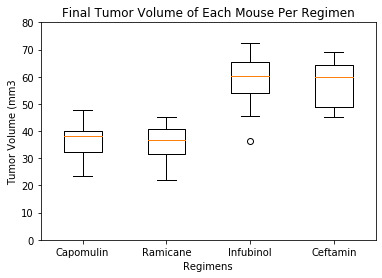

In [238]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Cap_tumor_vol_list = sorted_Cap_tumor_vol['Tumor Volume (mm3)'].tolist()
Ram_tumor_vol_list = sorted_Ram_tumor_vol['Tumor Volume (mm3)'].tolist()
Inf_tumor_vol_list = sorted_Inf_tumor_vol['Tumor Volume (mm3)'].tolist()
Cef_tumor_vol_list = sorted_Cef_tumor_vol['Tumor Volume (mm3)'].tolist()



data = [Cap_tumor_vol_list, Ram_tumor_vol_list, Inf_tumor_vol_list, Cef_tumor_vol_list]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Per Regimen')
ax1.set_ylabel('Tumor Volume (mm3')
ax1.set_xlabel('Regimens')
ax1.boxplot(data)
ax1.set_ylim(0, 80)
ax1.set_xticklabels(['Capomulin', "Ramicane", "Infubinol", 'Ceftamin'])
plt.show()

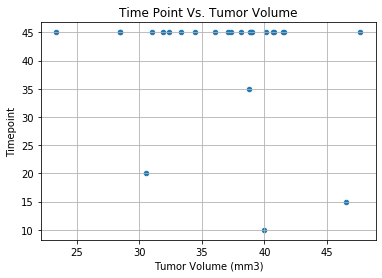

In [233]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
sorted_Cap_tumor_vol.plot(kind="scatter", x='Tumor Volume (mm3)', y='Timepoint', grid=True,
              title='Time Point Vs. Tumor Volume')

Mouse ID
b128    AxesSubplot(0.125,0.125;0.775x0.755)
b742    AxesSubplot(0.125,0.125;0.775x0.755)
f966    AxesSubplot(0.125,0.125;0.775x0.755)
g288    AxesSubplot(0.125,0.125;0.775x0.755)
g316    AxesSubplot(0.125,0.125;0.775x0.755)
i557    AxesSubplot(0.125,0.125;0.775x0.755)
i738    AxesSubplot(0.125,0.125;0.775x0.755)
j119    AxesSubplot(0.125,0.125;0.775x0.755)
j246    AxesSubplot(0.125,0.125;0.775x0.755)
l509    AxesSubplot(0.125,0.125;0.775x0.755)
l897    AxesSubplot(0.125,0.125;0.775x0.755)
m601    AxesSubplot(0.125,0.125;0.775x0.755)
m957    AxesSubplot(0.125,0.125;0.775x0.755)
r157    AxesSubplot(0.125,0.125;0.775x0.755)
r554    AxesSubplot(0.125,0.125;0.775x0.755)
r944    AxesSubplot(0.125,0.125;0.775x0.755)
s185    AxesSubplot(0.125,0.125;0.775x0.755)
s710    AxesSubplot(0.125,0.125;0.775x0.755)
t565    AxesSubplot(0.125,0.125;0.775x0.755)
u364    AxesSubplot(0.125,0.125;0.775x0.755)
v923    AxesSubplot(0.125,0.125;0.775x0.755)
w150    AxesSubplot(0.125,0.125;0.775x0.755)
w

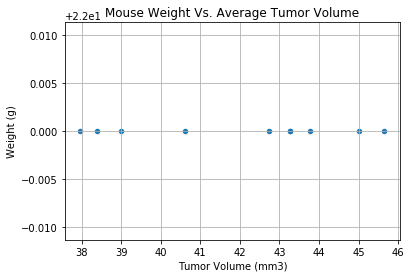

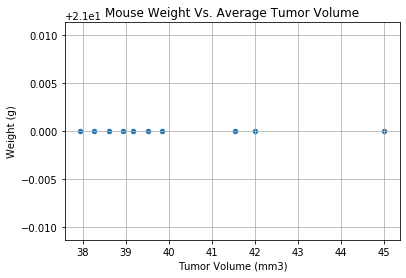

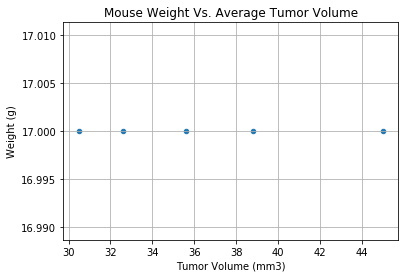

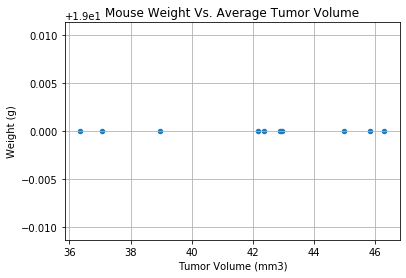

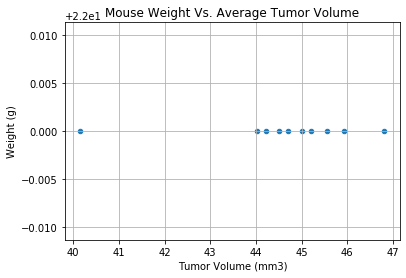

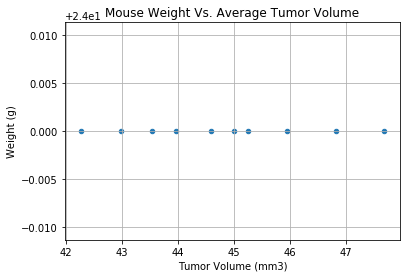

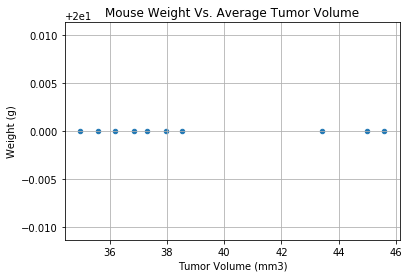

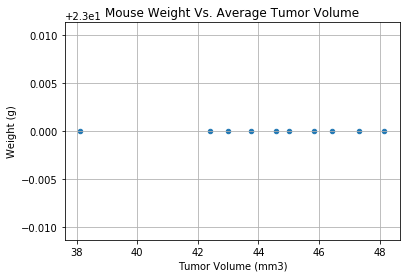

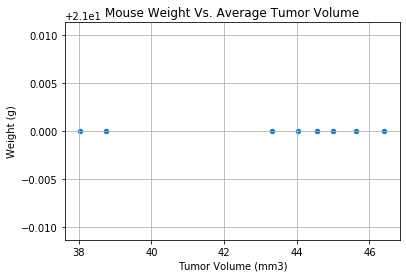

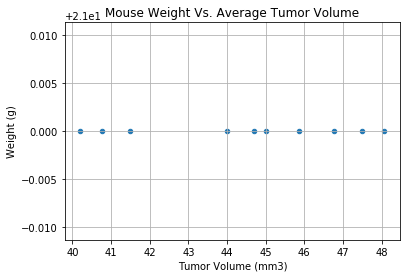

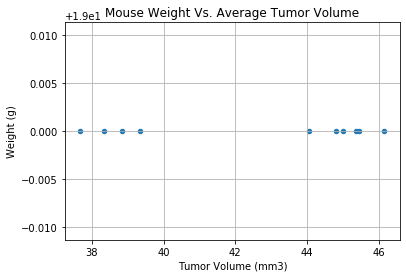

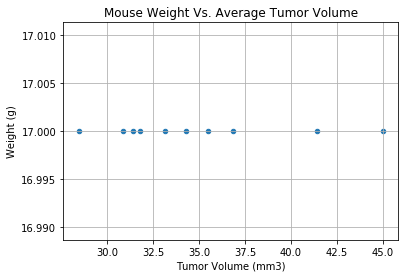

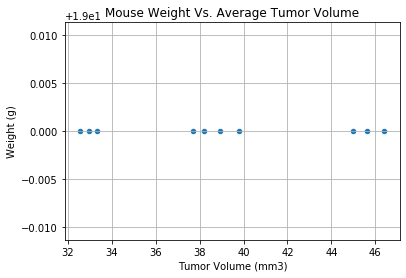

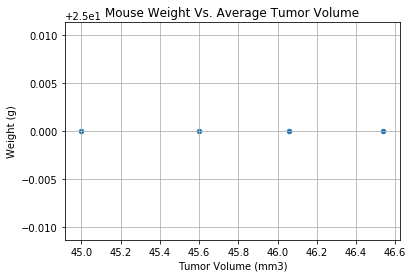

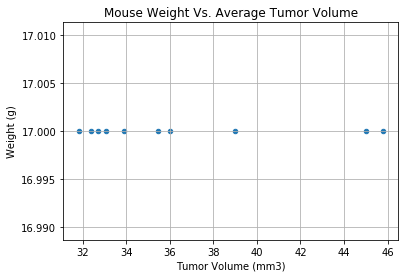

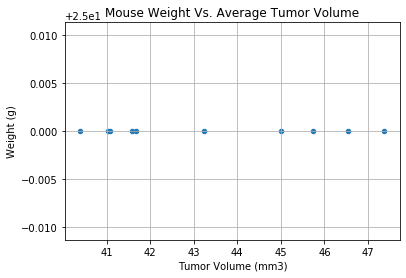

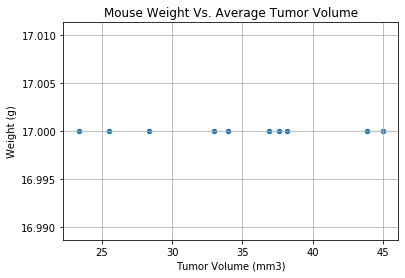

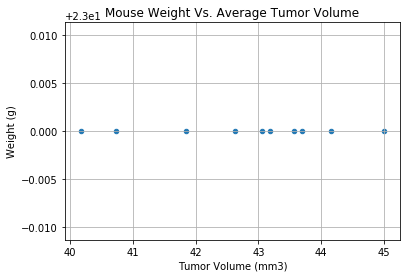

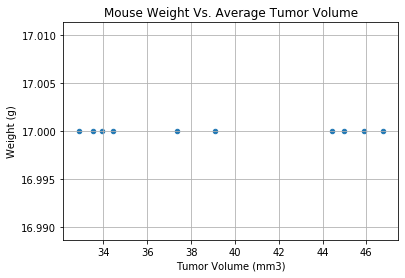

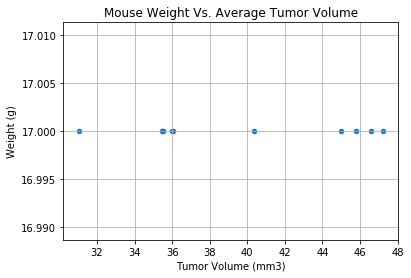

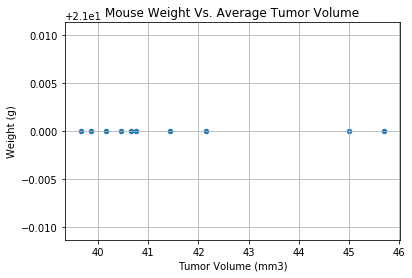

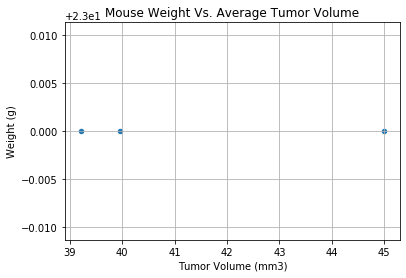

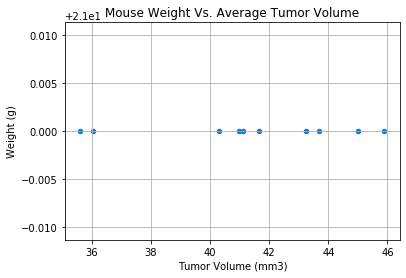

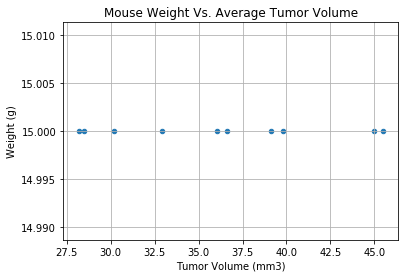

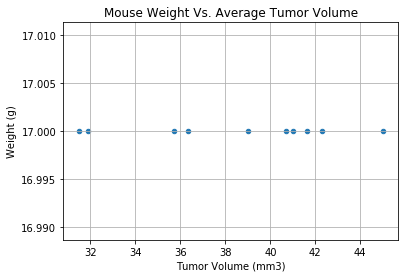

In [241]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_volume = grouped_Capomulin['Tumor Volume (mm3)'].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume)
average_tumor_volume_df
grouped_Capomulin.plot(kind="scatter", x='Tumor Volume (mm3)', y='Weight (g)', grid=True,
               title='Mouse Weight Vs. Average Tumor Volume')